In [1]:
import numpy as np
import matplotlib.pyplot as plt

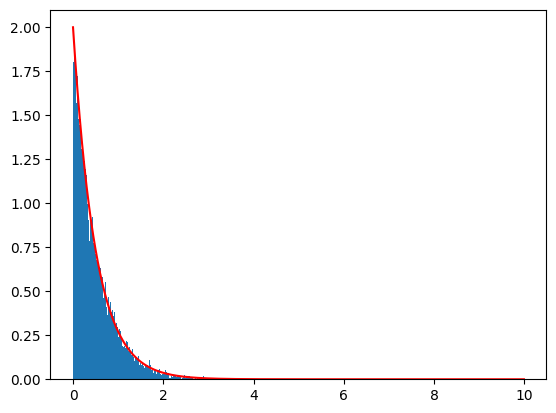

In [8]:
import numpy as np
import matplotlib.pyplot as plt
def sampleExp(Lambda = 2,maxCnt = 50000):
    ys = []
    standardXaxis = []
    standardExp = []
    for i in range(maxCnt):
        u = np.random.random()
        y = -1/Lambda*np.log(1-u) #F-1(X)
        ys.append(y)
    for i in range(1000):
        t = Lambda * np.exp(-Lambda*i/100)
        standardXaxis.append(i/100)
        standardExp.append(t)
    
    print()
    plt.plot(standardXaxis,standardExp,'r')
    plt.hist(ys,1000, density=True)
    plt.show()

sampleExp()

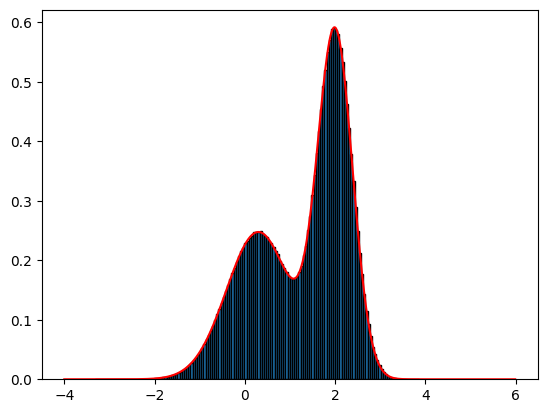

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f1(x):
    return (0.3*np.exp(-(x-0.3)**2) + 0.7* np.exp(-(x-2.)**2/0.3))/1.2113
x = np.arange(-4.,6.,0.01)
plt.plot(x,f1(x),color = "red")

size = int(1e+07)
sigma = 1.2
z = np.random.normal(loc = 1.4,scale = sigma, size = size)
qz = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-0.5*(z-1.4)**2/sigma**2)
k = 2.5
#z = np.random.uniform(low = -4, high = 6, size = size)
#qz = 0.1
#k = 10
u = np.random.uniform(low = 0, high = k*qz, size = size)

pz =  0.3*np.exp(-(z-0.3)**2) + 0.7* np.exp(-(z-2.)**2/0.3)
sample = z[pz >= u]
plt.hist(sample,bins=150, density=True, edgecolor='black')
plt.show()

In [5]:
u

array([0.00249223, 0.60382447, 0.36474119, ..., 0.61679929, 0.13872886,
       0.44068219])

In [13]:
def samplePI(maxCnt=10000000):
    accCnt = 0
    for _ in range(maxCnt):
        x = np.random.random()
        y = np.random.random()
        if np.sqrt(x**2+y**2)<1:
            accCnt += 1
    return (accCnt/maxCnt)*4

samplePI() 

3.141994

In [6]:
from scipy import stats

def f_x(x):
    return 1/(1 + np.exp(-x))

# 定义两个分布 p(x), q(x)
def distribution(mu=0, sigma=1):
    # return probability given a value
    distribution = stats.norm(mu, sigma)
    return distribution

# 采样点数
n = 1000

mu_target = 3.5
sigma_target = 1
mu_appro = 3
sigma_appro = 1

p_x = distribution(mu_target, sigma_target)
q_x = distribution(mu_appro, sigma_appro)


# 从 p(x) 采样，这里为了图方便p(x)也设定成了正态分布，所以看起来采样很容易，对于非高斯还是很麻烦的
s = 0
for i in range(n):
    # draw a sample
    x_i = np.random.normal(mu_target, sigma_target)
    s += f_x(x_i)
print("simulate value", s/n) # 0.954

# 从 q(x) 进行重要性采样
value_list = []
for i in range(n):
    # sample from different distribution
    x_i = np.random.normal(mu_appro, sigma_appro)
    value = f_x(x_i)*(p_x.pdf(x_i) / q_x.pdf(x_i))

    value_list.append(value)
# mean: 0.949, variance: 0.304

# 采样点数
n = 5000

mu_target = 3.5
sigma_target = 1
mu_appro = 1
sigma_appro = 1

p_x = distribution(mu_target, sigma_target)
q_x = distribution(mu_appro, sigma_appro)

simulate value 0.9573425707801086
